# 1D superconductor without spin-orbit coupling

## Hamiltonian
$$H^{\rm BdG}_{\bf k}(t) = \left[w_0 \left(e^{i ( \tau^z {\bf k} +\vec{\phi} t) \cdot {\bf a}}
+e^{-i ( \tau^z {\bf k} +\vec{\phi} t) \cdot {\bf a}} \right)-\mu \right]\tau^z\otimes \sigma^0 
- \tau^0 \otimes \vec{ B} \cdot \vec{\sigma} + \Delta \tau^x\otimes \sigma^0
$$

$$
w_k(t=0)=2 w_0 \cos(k) \tau_z\sigma_0
$$
$$
G^f_{k}(t=0,\omega=0)=\left[-(w_{k}( t=0) -B_x\tau_0\sigma_x-B_y\tau_0\sigma_y +\Delta\tau_x\sigma_0)+i \Gamma\tau_0\sigma_0 \right]^{-1}  
$$

$$\rho^f_k(\theta,\omega) = G_k^f(\theta,\omega) \Gamma \tau_0\sigma_0[G_k^f(\theta,\omega)]^\dagger
$$

$$v(k)=-2w_0sin(k)\tau_0\sigma_0$$

$$\sigma=
\frac{1}{8\pi} \sum_{k=-\pi}^{\pi} v(k) \rho^f_k(\theta=0,\omega=0)^2 v(k)
$$

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from Superconductor_1D_without_SOC import get_sigma, Rho_k

<IPython.core.display.Javascript object>


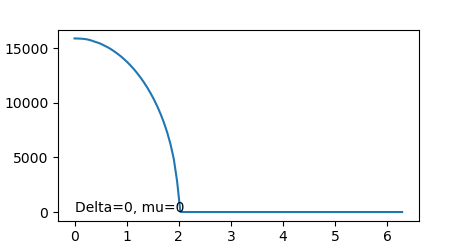

In [2]:
k = np.linspace(-np.pi, np.pi, 1000)
w_0 = 1
Gamma = 0.01
Delta = 0
B_y = 0
mu = 0

B_x = np.linspace(0, 2*np.pi, 100)
sigma_B_x = []
for B_x_value in B_x:
    sigma_B_x.append(get_sigma(k, w_0, Gamma, B_x_value, B_y, Delta, mu))

fig, ax  = plt.subplots()
ax.plot(B_x, np.real(sigma_B_x))
ax.set_xlabel(r"$\frac{B_x}{w_0}$");
ax.set_ylabel(r"$\sigma(B_x)$");
ax.text(0, 0, f"Delta={Delta}, mu={mu}");

<IPython.core.display.Javascript object>


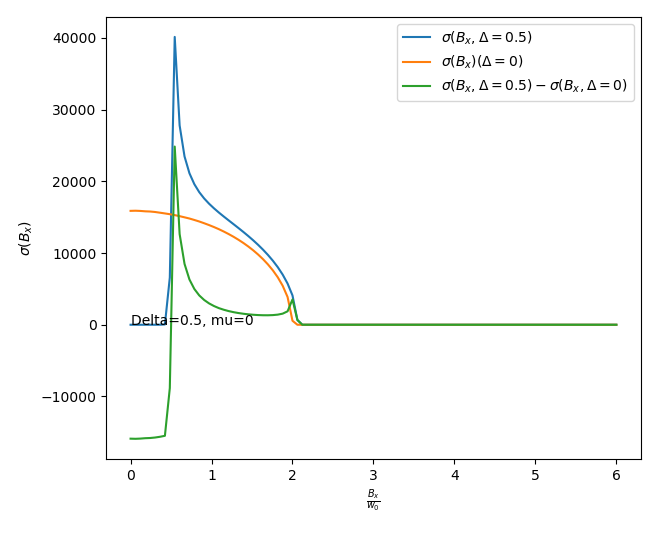

In [3]:
k = np.linspace(-np.pi, np.pi, 1000)
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_y = 0
mu = 0

B_x = np.linspace(0, 6, 100)
sigma_B_x_Delta = []
sigma_B_x = []

for B_x_value in B_x:
    sigma_B_x_Delta.append(get_sigma(k, w_0, Gamma, B_x_value, B_y, Delta, mu))
    sigma_B_x.append(get_sigma(k, w_0, Gamma, B_x_value, B_y, 0, mu))   #Delta = 0

fig, ax  = plt.subplots()
ax.plot(B_x, np.real(sigma_B_x_Delta), label=r"$\sigma(B_x, \Delta=0.5)$");
ax.plot(B_x, np.real(sigma_B_x), label=r"$\sigma(B_x)(\Delta=0)$");
ax.plot(B_x, np.real(np.array(sigma_B_x_Delta)-np.array(sigma_B_x)), label=r"$\sigma(B_x, \Delta=0.5)-\sigma(B_x,\Delta=0)$");

ax.set_xlabel(r"$\frac{B_x}{w_0}$");
ax.set_ylabel(r"$\sigma(B_x)$");
ax.text(0, 0, f"Delta={Delta}, mu={mu}");
plt.tight_layout()
plt.legend()

<IPython.core.display.Javascript object>


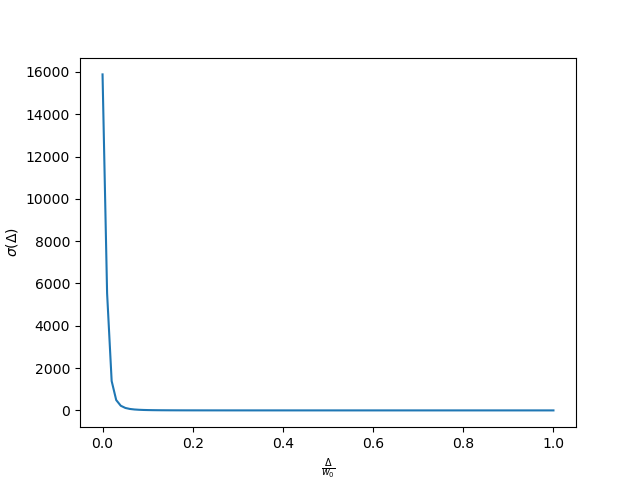

In [4]:
k = np.linspace(-np.pi, np.pi, 1000)
w_0 = 1
Gamma = 0.01
B_x = 0
B_y = 0
mu = 0

Delta = np.linspace(0, 1, 100)
sigma_Delta = []
for Delta_value in Delta:
    sigma_Delta.append(get_sigma(k, w_0, Gamma, B_x, B_y, Delta_value, mu))

fig, ax  = plt.subplots()
ax.plot(Delta, np.real(sigma_Delta))
ax.set_xlabel(r"$\frac{\Delta}{w_0}$");
ax.set_ylabel(r"$\sigma(\Delta)$");

<IPython.core.display.Javascript object>


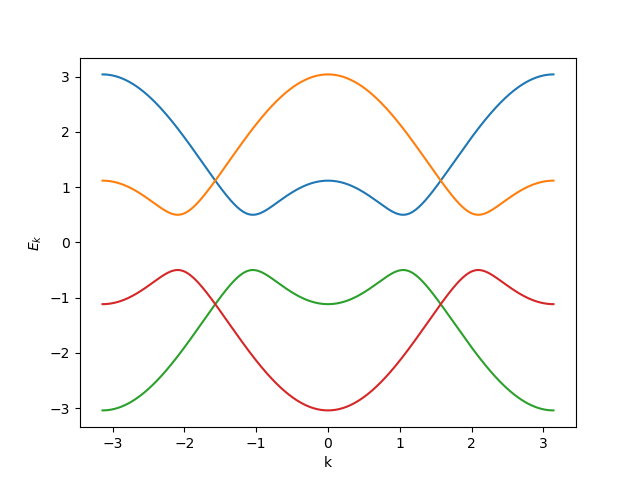

Text(0, 0.5, '$E_k$')

In [5]:
w_0 = 1
Delta = 0.5
B_x = 1
fig, ax = plt.subplots()
ax.plot(k, np.sqrt((2*w_0*np.cos(k))**2+Delta**2+B_x**2-4*B_x*w_0*np.cos(k)))
ax.plot(k, np.sqrt((2*w_0*np.cos(k))**2+Delta**2+B_x**2+4*B_x*w_0*np.cos(k)))
ax.plot(k, -np.sqrt((2*w_0*np.cos(k))**2+Delta**2+B_x**2-4*B_x*w_0*np.cos(k)))
ax.plot(k, -np.sqrt((2*w_0*np.cos(k))**2+Delta**2+B_x**2+4*B_x*w_0*np.cos(k)))
ax.set_xlabel("k")
ax.set_ylabel(r"$E_k$")

<IPython.core.display.Javascript object>


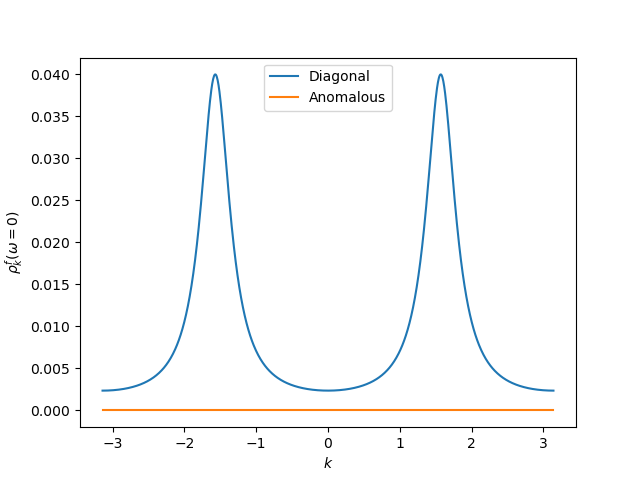

/home/gabriel/anaconda3/envs/DC-superconductivity/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/gabriel/anaconda3/envs/DC-superconductivity/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [6]:
k = np.linspace(-np.pi, np.pi, 1000)
w_0 = 1
Gamma = 0.01
Delta = 0.5
B_x = 0
B_y = 0
mu = 0

rho_k = np.array([Rho_k(k, w_0, Gamma, B_x, B_y, Delta, mu) for k in k], dtype=complex)
fig, ax  = plt.subplots()
ax.plot(k, rho_k[:, 0, 0], label="Diagonal")
#ax.plot(k, rho_k[:, 1, 1])
ax.plot(k, rho_k[:, 0, 1], label="Anomalous")
#ax.plot(k, rho_k[:, 1, 0])

ax.set_xlabel(r"$k$");
ax.set_ylabel(r"$\rho^f_k(\omega=0)$");
ax.legend()
